**Medical Cost Personal **



In [19]:
#import librariers


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [20]:
# analysis and explore the Data 
# 1. import the dataset

df = pd.read_csv("/kaggle/input/insurance1/insurance.csv")


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.describe().round(2)

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


In [28]:
df.sort_values(by="charges",ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


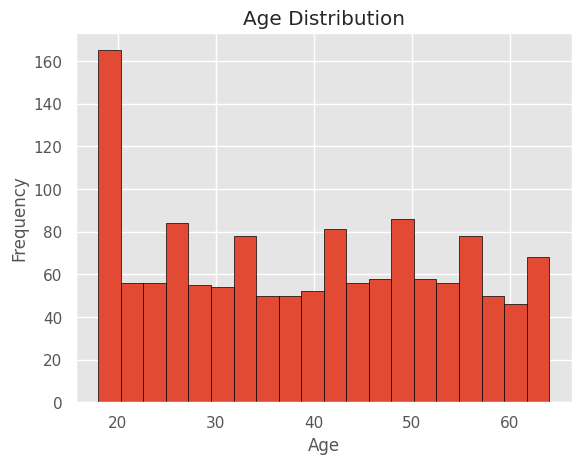

In [29]:
df["age"].hist(bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()




In [30]:
df["age"].value_counts(normalize=True)*100


age
18    5.160808
19    5.011219
50    2.169035
51    2.169035
47    2.169035
46    2.169035
45    2.169035
20    2.169035
48    2.169035
52    2.169035
22    2.094241
49    2.094241
54    2.094241
53    2.094241
21    2.094241
26    2.094241
24    2.094241
25    2.094241
28    2.094241
27    2.094241
23    2.094241
43    2.019447
29    2.019447
30    2.019447
41    2.019447
42    2.019447
44    2.019447
31    2.019447
40    2.019447
32    1.944652
33    1.944652
56    1.944652
34    1.944652
55    1.944652
57    1.944652
37    1.869858
59    1.869858
58    1.869858
36    1.869858
38    1.869858
35    1.869858
39    1.869858
61    1.720269
60    1.720269
63    1.720269
62    1.720269
64    1.645475
Name: proportion, dtype: float64

In [31]:
df["smoker"].value_counts(normalize=True)*100

smoker
no     79.506358
yes    20.493642
Name: proportion, dtype: float64

# ****the data and checks for the structure, data types, and any missing values. Additionally, it provides summary statistics for numerical columns.**

#Conclusions:

#The dataset contains 1338 entries with no missing values.
#The columns include both numerical and categorical data.
#The average age is around 39 years, and the average BMI is 30.66.
#Medical charges vary widely, with a maximum charge of around 63,770.

In [32]:
sns.set(style="whitegrid")



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


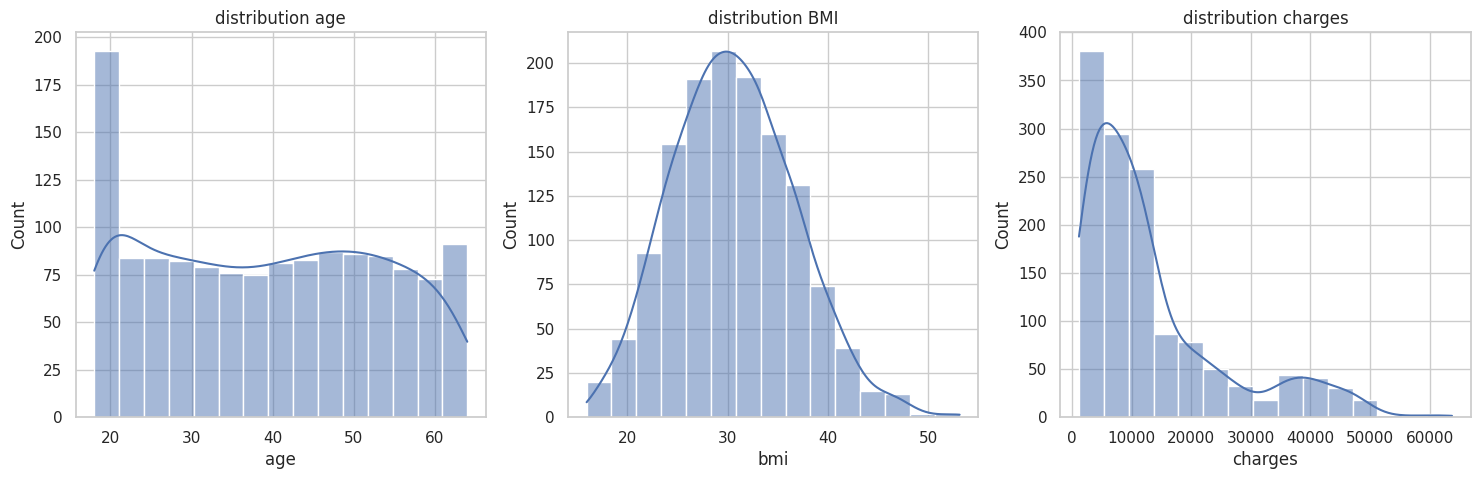

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df['age'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('distribution age')

sns.histplot(data=df['bmi'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('distribution BMI')

sns.histplot(data=df['charges'], bins=15, kde=True, ax=axes[2])
axes[2].set_title('distribution charges')

plt.show()


**# Age and BMI are more evenly distributed, with no major anomalies.**
Medical charges, however, show a long tail, indicating that while most people have low costs, a few individuals drive the average up with extremely high expenses.
This information helps us understand the spread and concentration of key numerical variables, which is useful for further analysis or predictive modeling.

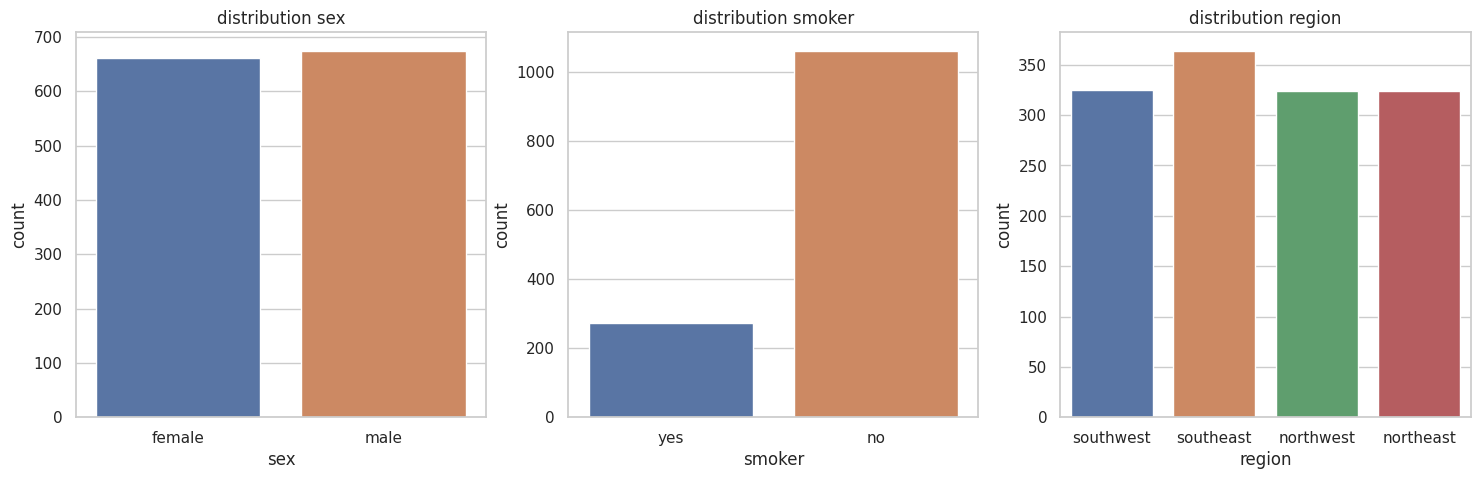

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='sex', ax=axes[0])
axes[0].set_title('distribution sex')

sns.countplot(data=df, x='smoker', ax=axes[1])
axes[1].set_title('distribution smoker')

sns.countplot(data=df, x='region', ax=axes[2])
axes[2].set_title('distribution region')

plt.show()

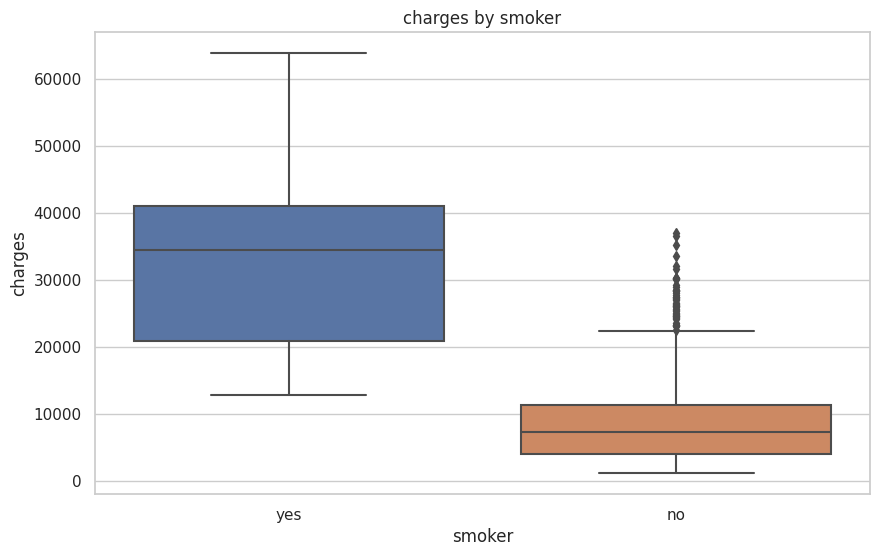

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('charges by smoker')
plt.show()


# The boxplot clearly shows that smokers are more likely to incur higher medical expenses than non-smokers.
This visualization supports the idea that smoking has a strong impact on healthcare costs, which aligns with previous findings from the statistical tests.

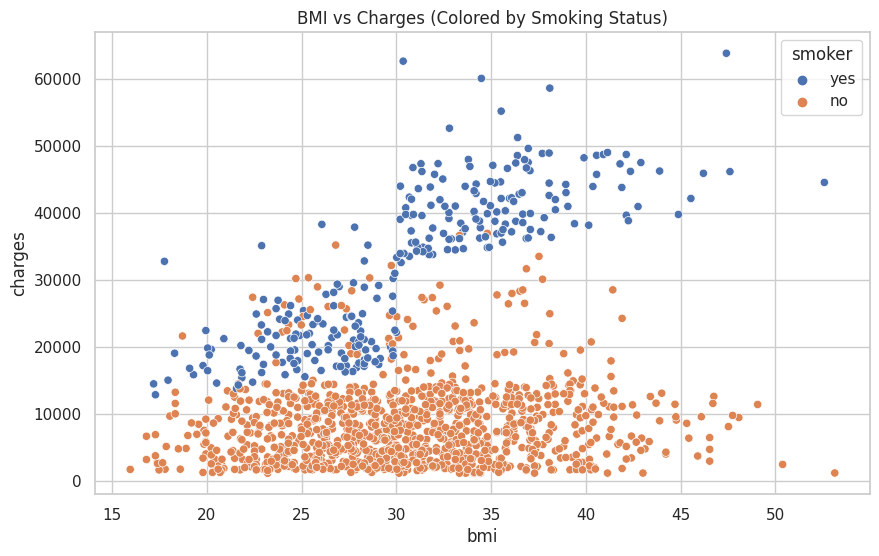

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Charges (Colored by Smoking Status)')
plt.show()


**Smoking** has a greater impact on healthcare costs than **BMI**, as smokers consistently show higher charges across all **BMI** levels.

In [37]:
plt.figure(figsize=(8, 5))
correlation = numeric_df.corr()  
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'numeric_df' is not defined

<Figure size 800x500 with 0 Axes>

**The heatmap highlights that age and smoking status (as inferred from prior analysis) are more influential on healthcare costs than BMI or number of children.
The lack of significant correlations between some features also suggests that multiple factors must be considered independently when predicting healthcare costs.**

In [ ]:
from scipy.stats import ttest_ind


smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']


t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between smoker and non-smoker charges.")
else:
    print("No significant difference between smoker and non-smoker charges.")


In [ ]:
from scipy.stats import f_oneway


regions = [df[df['region'] == region]['charges'] for region in df['region'].unique()]

# TEST ANOVA
f_stat, p_value = f_oneway(*regions)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in charges between regions.")
else:
    print("No significant difference in charges between regions.")
